In [1]:
from superfv import AdvectionSolver, initial_conditions, plot_1d_slice
from functools import partial
import matplotlib.pyplot as plt

In [2]:
def passive1(x, y, z, t, *, xp):
    bounds = (1, 2)
    return (bounds[1] - bounds[0]) * xp.where(xp.abs(x - 0.5) < 0.25, 1, 0) + bounds[0]


N = 64
T = 1.0

sim1 = AdvectionSolver(
    ic=partial(initial_conditions.sinus, vx=1),
    ic_passives={"passive1": passive1},
    nx=N,
    p=3,
    ZS=True,
    SED=True,
    PAD={"rho": (0, 1)},
)

sim2 = AdvectionSolver(
    ic=partial(initial_conditions.sinus, vx=1),
    ic_passives={"passive1": passive1},
    nx=N,
    p=3,
    MOOD=True,
    cascade="muscl",
    max_MOOD_iters=1,
    NAD=True,
    NAD_rtol=1e-2,
    NAD_atol=1e-8,
    SED=True,
    PAD={"rho": (0, 1)},
)

In [3]:
sim1.run(T)
sim2.run(T)

Step #81 @ t=1.00e+00 | dt=1.55e-15 | (done)                                                        
Step #81 @ t=1.00e+00 | dt=1.55e-15 | (done)                                                        


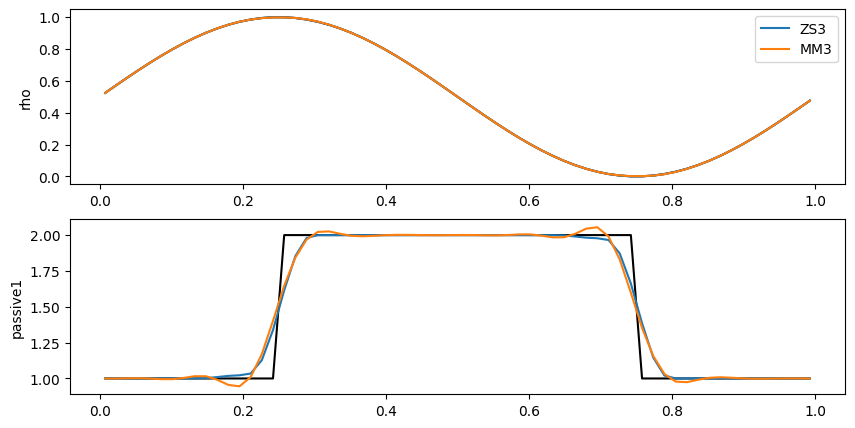

In [4]:
fig, axs = plt.subplots(2, 1, figsize=(10, 5))
axs[0].set_ylabel("rho")
axs[1].set_ylabel("passive1")

plot_1d_slice(sim1, axs[0], "rho", cell_averaged=True, t=0, color="k")
plot_1d_slice(sim1, axs[0], "rho", cell_averaged=True, label="ZS3")
plot_1d_slice(sim2, axs[0], "rho", cell_averaged=True, label="MM3")

plot_1d_slice(sim1, axs[1], "passive1", cell_averaged=True, t=0, color="k")
plot_1d_slice(sim1, axs[1], "passive1", cell_averaged=True, label="ZS3")
plot_1d_slice(sim2, axs[1], "passive1", cell_averaged=True, label="MM3")

axs[0].legend()